# Reductions

Reductions allow us to compute summary statistics and other useful aggregations over our data.

The dataset for these exercises contains minutely price and volume observations for 5 stocks for October of 2017.

In [1]:
import numpy as np
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt

prices_df = pd.read_csv('prices.csv', index_col='dt', parse_dates=['dt'])
volumes_df = pd.read_csv('volumes.csv', index_col='dt', parse_dates=['dt'])

display(prices_df.head())
display(volumes_df.head())

,AAPL,MSFT,TSLA,MCD,BK
dt,,,,,
2017-10-02 13:31:00,154.34,74.880,342.330,156.380,52.736
2017-10-02 13:32:00,154.07,74.832,341.480,156.660,52.686
2017-10-02 13:33:00,153.72,74.835,341.830,156.324,52.756
2017-10-02 13:34:00,153.69,74.890,341.240,156.660,52.726
2017-10-02 13:35:00,153.45,74.810,341.873,156.670,52.706


,AAPL,MSFT,TSLA,MCD,BK
dt,,,,,
2017-10-02 13:31:00,420042.0,409211.0,49907.0,85774.0,30276.0
2017-10-02 13:32:00,161960.0,49207.0,18480.0,6866.0,4511.0
2017-10-02 13:33:00,118283.0,24043.0,47039.0,3000.0,3001.0
2017-10-02 13:34:00,103544.0,62383.0,13444.0,4364.0,900.0
2017-10-02 13:35:00,88012.0,40175.0,36556.0,820.0,1500.0


In [2]:
prices = prices_df.values
volumes = volumes_df.values
timestamps = prices_df.index.values

In [3]:
timestamps

array(['2017-10-02T13:31:00.000000000', '2017-10-02T13:32:00.000000000',
       '2017-10-02T13:33:00.000000000', ...,
       '2017-10-31T19:58:00.000000000', '2017-10-31T19:59:00.000000000',
       '2017-10-31T20:00:00.000000000'], dtype='datetime64[ns]')

**Exercise:** Compute the average price for each stock.

In [11]:
# Use average from numpy.Axis 0 is column and 1 is row

np.average(prices,axis=0)
# ?np.average

**Exercise:** Compute the average volume for each stock.

In [12]:
# Use average from numpy.Axis 0 is column and 1 is row
np.average(volumes,axis=0)

array([47083.83321678, 39618.75745921, 10911.53310023,  5934.88356643,
        7774.04487179])

**Exercise:** Compute the number of times that each stock's price increased.

In [46]:
# np.diff?
# The diff function is used to calculate the difference between neighbouring values along an axis.
# The dimension of the output will be one smaller than the input since we are taking the difference
# the last element will not be having an element ot take the difference from.

(np.diff(prices, axis=0) > 0).sum(axis=0)

array([4095, 3957, 4257, 4018, 3570])

**Exercise:** Compute the volume-weighted average price of all 5 stocks.

In [26]:
# np.average?

# Pass the price as the first argument,this needs to be done column wise so axis will be 0 and 
# weights will be the quantity of the stocks sold

np.average(prices,axis=0,weights=volumes)

array([158.70686244,  79.33035404, 343.7402141 , 163.62733541,
        52.92935945])

**Exercise:** Compute the timestamps where the lowest price occurred for each stock.

In [29]:
# np.argmin?

indicesmin=np.argmin(prices,axis=0)

timestamps[indicesmin]

array(['2017-10-04T14:47:00.000000000', '2017-10-04T14:41:00.000000000',
       '2017-10-27T13:50:00.000000000', '2017-10-02T14:02:00.000000000',
       '2017-10-25T16:31:00.000000000'], dtype='datetime64[ns]')

**Exercise:** Compute the average volume for each minute of the day, aggregated across all 5 stocks.

(**HINT:** There are exactly 390 trading minutes in each day in this dataset.)

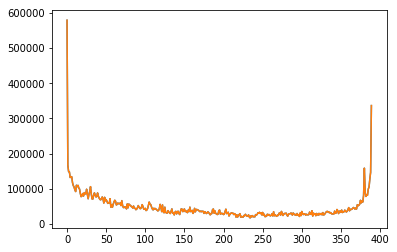

In [31]:
plt.plot(volumes[:, 0].reshape(22, 390).mean(axis=0))
plt.show()

In [47]:
# Sum the volume across all stocks for each minute.
# shape: (8580,)
total_volume = volumes.sum(axis=1)

# Reshape so that we have a row per day, 
# and a column per minute within that day.
# shape: (22, 390)
grouped_volumes = total_volume.reshape(22, 390)

average_volume_per_minute = grouped_volumes.sum(axis=0)
average_volume_per_minute

array([29031100.,  7509214.,  8226928.,  6759109.,  6249242.,  7035908.,
        6147214.,  5436660.,  5119207.,  5092034.,  4980700.,  5113490.,
        5077632.,  4817123.,  4823413.,  4639989.,  4981677.,  4286049.,
        4408734.,  4037619.,  4362682.,  4528514.,  4820237.,  4497222.,
        4490837.,  4366405.,  4032038.,  3616295.,  3717997.,  4449946.,
        4892766.,  4088096.,  3897711.,  3703538.,  3552418.,  3926909.,
        3773569.,  3745476.,  3538597.,  3718324.,  3628428.,  3362865.,
        3357016.,  3236243.,  3322587.,  3632337.,  3228203.,  2801854.,
        3523461.,  3190180.,  3434624.,  3147993.,  2950505.,  2863770.,
        3017006.,  3261998.,  2572259.,  3026572.,  2650053.,  2602113.,
        3267138.,  3101799.,  3047606.,  2732906.,  2589417.,  2772828.,
        2577330.,  2756297.,  2738689.,  2517629.,  2941712.,  2685451.,
        2636527.,  2237435.,  2371354.,  2407560.,  2104394.,  2494019.,
        2189391.,  2633241.,  2377778.,  2374142., 

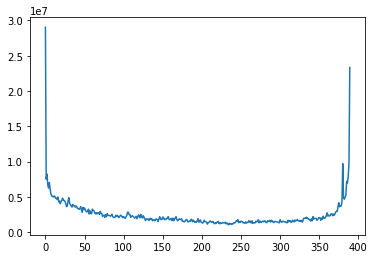

In [50]:
plt.plot(average_volume_per_minute)
plt.show()